In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np
from scipy.stats import norm
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.optimize import curve_fit
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt;
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
import itertools
from statsmodels.tsa.stattools import kpss
plt.rcdefaults()
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.forecasting.theta import ThetaModel

In [2]:
df_uah1 = pd.read_excel("/Users/Marta/Desktop/diploma/Data_1_S.xlsx", "quantity")
df_uah1 = df_uah1.set_index(["Period"])
df_uah1["Total 1"] = df_uah1["T1"] +df_uah1["T2"] +df_uah1["T3"] +df_uah1["T4"]
df_uah1["Total 2"] = df_uah1[[c for c in df_uah1.columns if "P" in c]].sum(axis=1)
df_uah1["Total"] = df_uah1["Total 1"] + df_uah1["Total 2"]

In [3]:
def predict_smoothing(y, i, x=None, prediction_len=30, var_name=None, theta=None):
    tm = ThetaModel(y, method="additive")
    res = tm.fit(use_mle=True)
#     try:
    f, ax = plt.subplots(figsize=(10, 6))
    ax.plot(df_uah1.index, df_uah1["Total"],
        marker="o",
        color="black",
        
    )
    ax.set_ylabel("series")
    ax.set_xlabel("Time")
    if theta is not None:
        preds_fit1 = res.forecast(prediction_len, theta) #theta=1.2
        print(len(preds_fit1),len(df_uah1.index[-prediction_len:]))
    else:
        preds_fit1 = res.forecast(prediction_len)
        print(len(preds_fit1),len(df_uah1.index[-prediction_len:]))
    ax.plot(list(df_uah1.index[-prediction_len:]), list(preds_fit1), marker="o", color="yellow")


    plt.show()

    mse_train, mape_train = 0, 0 #np.sqrt(mse(preds_fit1[:len(y)], y)), mape(preds_fit1[:len(y)], y)
    mse_test, mape_test = np.sqrt(mse(preds_fit1, df_uah1[var_name].iloc[-prediction_len:])), mape(preds_fit1,  df_uah1[var_name].iloc[-prediction_len:])

    print(var_name, theta, mse_train, mape_train, mse_test, mape_test)
    scores.loc[i, :] = [var_name, theta,
                        mse_train, mape_train, mse_test, mape_test, len(df_uah2)]

    plt.show()
    print("Figure 7.6: Forecasting using Theta model method.")


In [1]:
scores = pd.DataFrame(columns=["Series", "Theta",
                               "RMSE_train", "MAPE_train", "RMSE_test", "MAPE_test", "Cross_validation sample"])
df_uah1 = df_uah1.astype(np.float64)

14 14


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


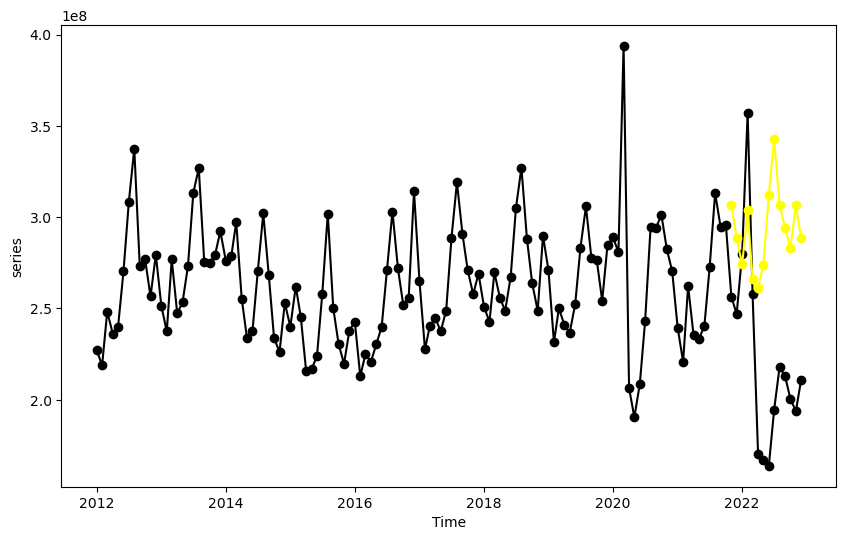

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


Total 1 0 0 88948796.03835928 0.2622929490599519
Figure 7.6: Forecasting using Theta model method.
14 14


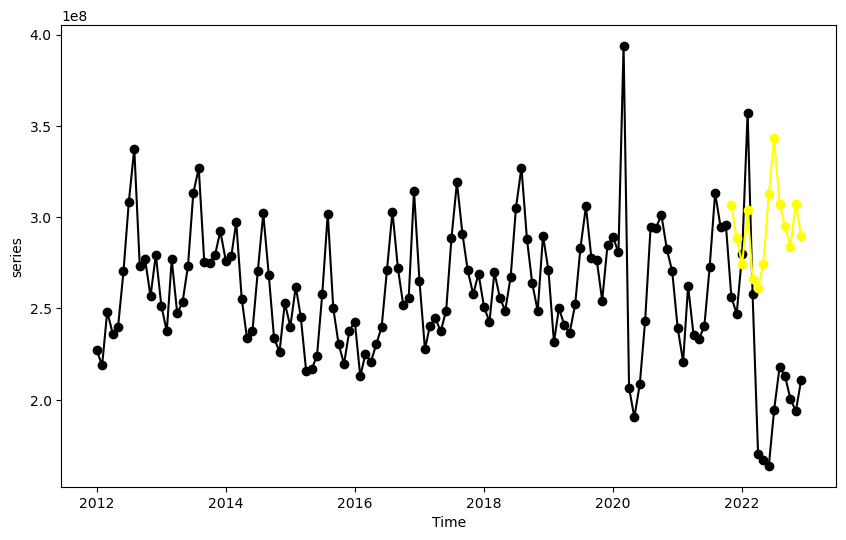

Total 1.2 0 0 89427195.18635991 0.2632358714033359
Figure 7.6: Forecasting using Theta model method.


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


14 14


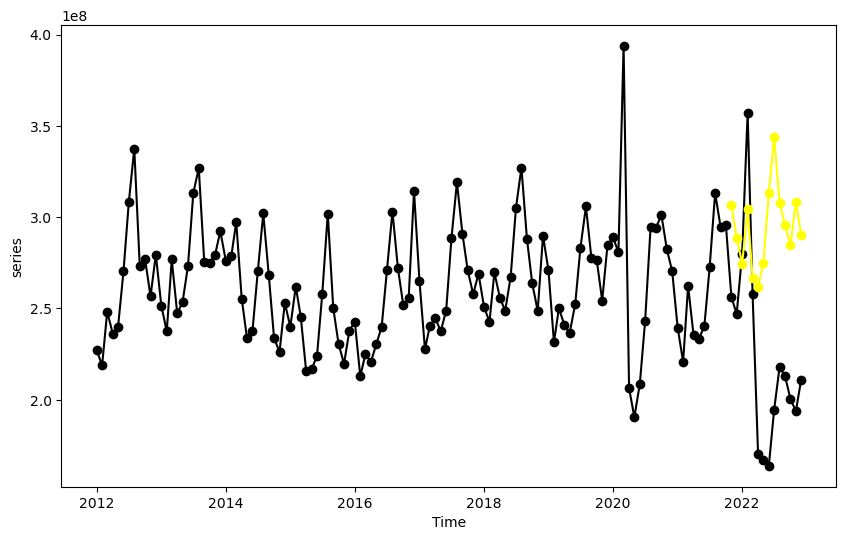

Total 1.5 0 0 89906513.1804892 0.2641742676821141
Figure 7.6: Forecasting using Theta model method.


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


14 14


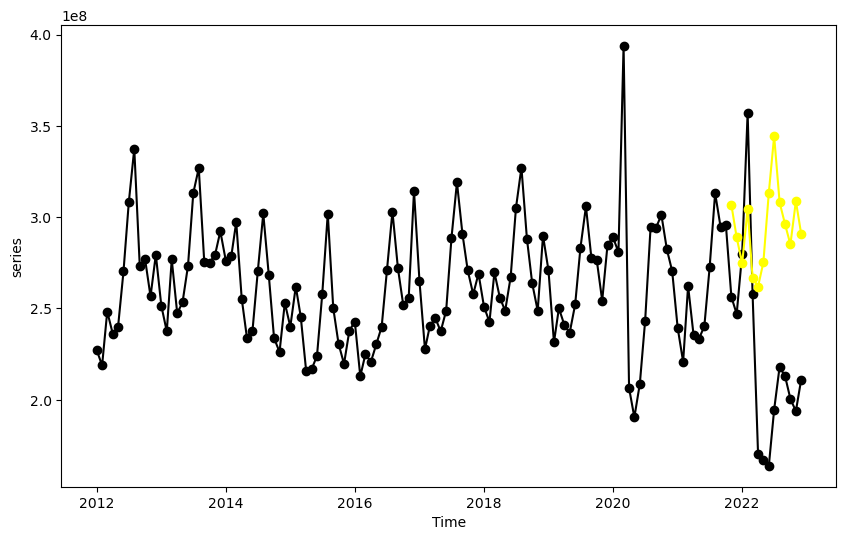

Total 1.75 0 0 90180816.08308439 0.26470847514533574
Figure 7.6: Forecasting using Theta model method.


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


14 14


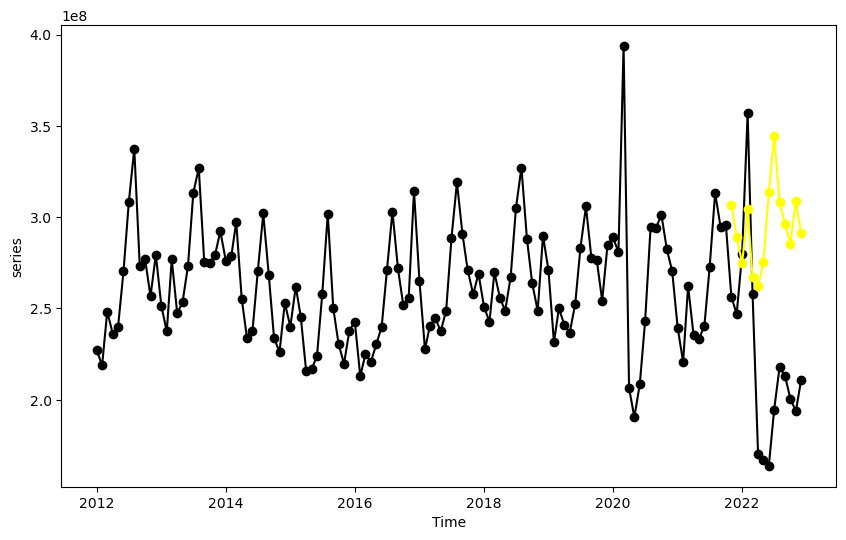

Total 2 0 0 90386735.40291254 0.2651081719732121
Figure 7.6: Forecasting using Theta model method.


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


14 14


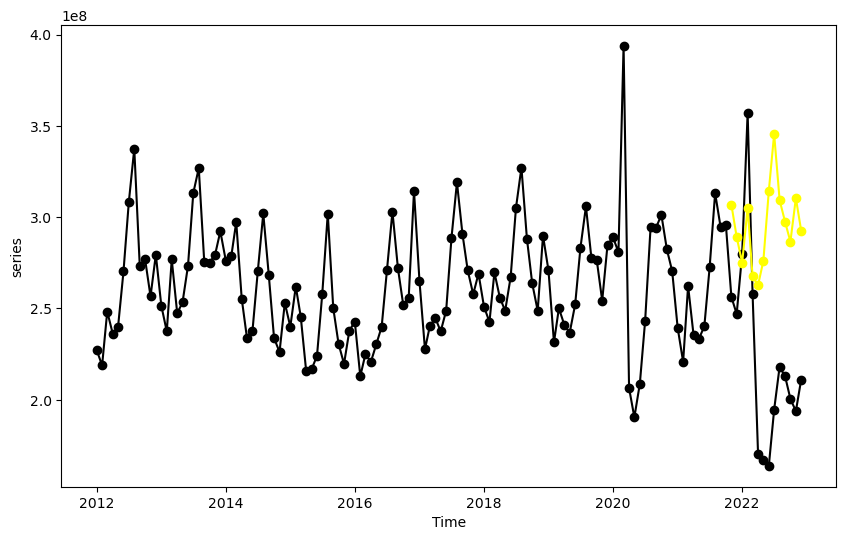

Total 4 0 0 91108732.87991388 0.2665006796038639
Figure 7.6: Forecasting using Theta model method.


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


14 14


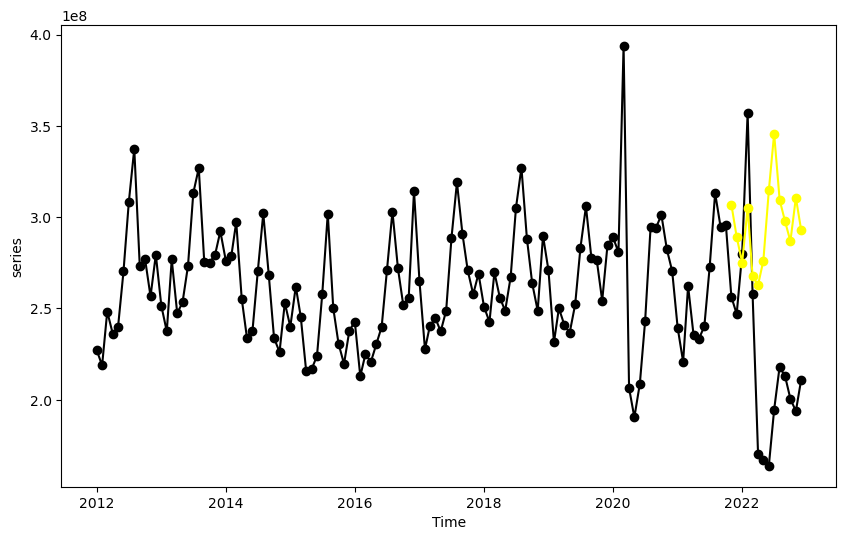

Total 5 0 0 91253368.4738874 0.2667779873050503
Figure 7.6: Forecasting using Theta model method.


In [12]:
# i = 0

df_uah2 = df_uah1.iloc[:int(len(df_uah1)*0.9)]
preds_len = len(df_uah1) - len(df_uah2)

var_ = "Total"
for theta in [1, 1.2, 1.5, 1.75, 2, 4, 5]:
    predict_smoothing(df_uah2["Total"], i=i, x=None, prediction_len=preds_len, var_name=var_, theta=theta)
    i += 1